In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time

In [425]:
def get_live(symbol):
    data = {
            "symbol":symbol,
            "api_token":"xfcqGEwXwqrz4sVnriDVatbsMf5Lhs37LDkwO38Jq3MK6XyvOieQDTrHhM7M",
        }

    data = json.dumps(data)

    URL = "http://intraday.worldtradingdata.com/api/v1/stock/?symbol=SPCE&interval=1&range=7&api_token=xfcqGEwXwqrz4sVnriDVatbsMf5Lhs37LDkwO38Jq3MK6XyvOieQDTrHhM7M"
    r = requests.get(url = URL) 
    return r.json()

In [264]:
def get_history(symbol):
    data = {
        "symbol":"SPCE",
        "api_token":"xfcqGEwXwqrz4sVnriDVatbsMf5Lhs37LDkwO38Jq3MK6XyvOieQDTrHhM7M",
        "interval":"1",
        "range":"1"
    }

    data = json.dumps(data)

    URL = "http://intraday.worldtradingdata.com/api/v1/intraday/?symbol=SPCE&interval=5&range=30&api_token=xfcqGEwXwqrz4sVnriDVatbsMf5Lhs37LDkwO38Jq3MK6XyvOieQDTrHhM7M&output=csv"
    #URL = "http://prod.ds.oami.eu/ocrtesseractserver/"
    #    PARAMS = json.dumps({"image":encoded_base64})
    r = requests.get(url = URL) 
    return r.text

In [265]:
r = get_history("SPCE")

In [319]:
data = []
for d in r.split("\n")[2:-1]:
    v = d.split(",")
    data.append(v)
data = data[::-1]

In [320]:
df = pd.DataFrame(data)
df.columns = ["date", "open", "close", "high", "low", "volume"]
df.open  = df.open.astype(float)
df.close = df.close.astype(float)
df.high = df.high.astype(float)
df.low = df.low.astype(float)
df.volume = df.volume.astype(int)/10000
df.head()

,date,open,close,high,low,volume
0,"""2019-11-26 09:30:00""",7.19,7.36,7.38,7.16,12.5626
1,"""2019-11-26 09:35:00""",7.39,7.41,7.43,7.32,10.4680
2,"""2019-11-26 09:40:00""",7.42,7.33,7.46,7.33,8.2575
3,"""2019-11-26 09:45:00""",7.34,7.39,7.41,7.34,3.9795
4,"""2019-11-26 09:50:00""",7.39,7.48,7.49,7.36,14.1352


In [321]:
df.head()

,date,open,close,high,low,volume
0,"""2019-11-26 09:30:00""",7.19,7.36,7.38,7.16,12.5626
1,"""2019-11-26 09:35:00""",7.39,7.41,7.43,7.32,10.4680
2,"""2019-11-26 09:40:00""",7.42,7.33,7.46,7.33,8.2575
3,"""2019-11-26 09:45:00""",7.34,7.39,7.41,7.34,3.9795
4,"""2019-11-26 09:50:00""",7.39,7.48,7.49,7.36,14.1352


In [322]:
df['low_mavg'] = df.low.rolling(60).mean()
df['close_mavg'] = df.close.rolling(60).mean()

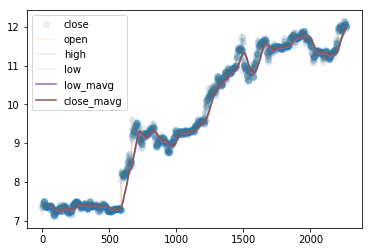

In [323]:
plt.plot(df.close, "o", label="close", alpha=0.1);
plt.plot(df.open, label="open", alpha=0.1);
plt.plot(df.high, label="high", alpha=0.1);
plt.plot(df.low, label="low", alpha=0.1);
plt.plot(df.low_mavg, label="low_mavg");
plt.plot(df.close_mavg, label="close_mavg");
plt.legend()
plt.show()

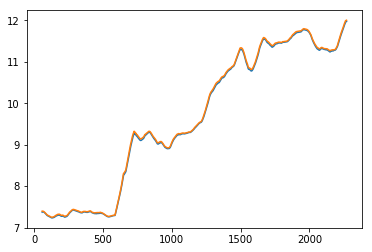

In [324]:
plt.plot(df.low_mavg, label="low_mavg");
plt.plot(df.close_mavg, label="close_mavg");

In [325]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

In [326]:
y = df.close
X = df.drop(["close", "date", "close_mavg", "low_mavg"], axis=1)
X.head()

,open,high,low,volume
0,7.19,7.38,7.16,12.5626
1,7.39,7.43,7.32,10.4680
2,7.42,7.46,7.33,8.2575
3,7.34,7.41,7.34,3.9795
4,7.39,7.49,7.36,14.1352


In [327]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.33, random_state=44)

In [328]:
lr = LinearRegression().fit(X_train, y_train)
c = lr.coef_
print(lr.coef_, lr.intercept_)
print(lr.coef_[-1])

[-5.21333901e-01  7.85370309e-01  7.36186528e-01 -7.32746303e-05] -0.0016914918032355786
-7.327463026962633e-05


In [329]:
y_pred = lr.predict(X_test)

In [330]:
print(y_test.shape)

(750,)


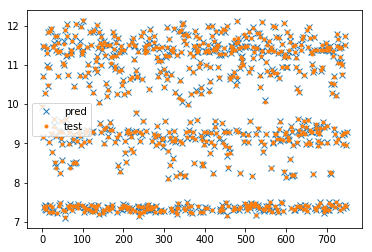

In [331]:
plt.figure()
plt.plot(y_pred, "x", label="pred")
plt.plot(y_test, ".", label="test")
plt.legend();

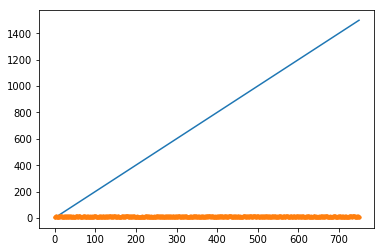

In [332]:
x = np.linspace(0, len(y_test), len(y_test))
yy = x*c[-4]+x*c[-3]+x*c[-2]+x*c[-1]
yy = x*c[-1]+x*c[-2]+x*c[-3]+x*c[-4]+x
# compose plot
plt.plot(yy);
plt.plot(y_test, ".");

In [333]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [334]:
dataset = df.drop(["date", "low_mavg", "close_mavg"], axis=1)

In [335]:
dataset.head()

,open,close,high,low,volume
0,7.19,7.36,7.38,7.16,12.5626
1,7.39,7.41,7.43,7.32,10.4680
2,7.42,7.33,7.46,7.33,8.2575
3,7.34,7.39,7.41,7.34,3.9795
4,7.39,7.48,7.49,7.36,14.1352


In [347]:
X = dataset.values[:-1]
y = dataset['close'].values

Y = y[1:] 

X_train = X[0:-200]
Y_train = Y[0:-200]
X_test = X[-200:]
Y_test = Y[-200:]


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test  = np.reshape(X_test,  (X_test.shape[0],  1, X_test.shape[1]))

In [348]:
len(X_train), len(Y_train),len(X_test), len(Y_test)

(2069, 2069, 200, 200)

In [398]:
Y[0:4]

array([7.41, 7.33, 7.39, 7.48])

In [421]:
model = Sequential()
model.add(LSTM(24, input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(X_train, Y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
2069/2069 [==============================] - 14s 7ms/step - loss: 6.4419
Epoch 2/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0679
Epoch 3/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0243
Epoch 4/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0273
Epoch 5/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0226
Epoch 6/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0173
Epoch 7/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0220
Epoch 8/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0184
Epoch 9/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0367
Epoch 10/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0232
Epoch 11/20
2069/2069 [==============================] - 10s 5ms/step - loss: 0.0156
Epoch 12/20
2069/2069 [==============================] - 10s 5ms/step - lo

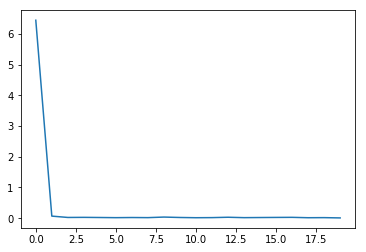

In [422]:
plt.plot(hist.history['loss']);

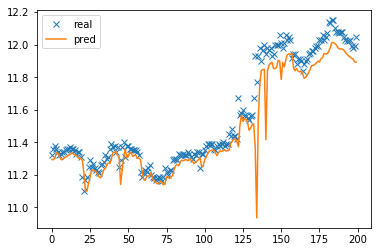

In [423]:
plt.plot(Y_test, "x", label="real")
pred = model.predict(X_test)
plt.plot(pred, label="pred")
plt.legend();

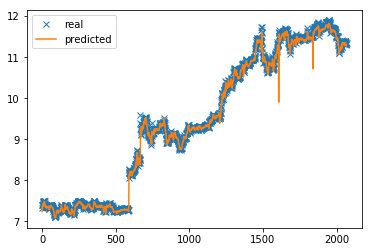

In [424]:
plt.plot(Y_train, "x", label="real");
plt.plot(model.predict(X_train)[:,0], label="predicted")
plt.legend();

In [346]:
def sim(amodel, tX, tY):
    
    pred = model.predict(tX)
    real = tY.copy()
    plt.plot(real, label="real")
    plt.plot(pred, label="pred")
    for i in range(len(tY)):
        x = tX[i]
        y = tY[i]
        
        vp = amodel.predic(x)
        
        

In [ ]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
#plt.style.use('ggplot')

# Input variables
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2018, 3, 29)
stock = 'WFC'

# Extrating data
df = web.DataReader(stock,'morningstar', start, end)
df = df['Close']


plt.plot(df['WFC'],label= 'Close')
plt.plot(df['WFC'].rolling(9).mean(),label= 'MA 9')
plt.plot(df['WFC'].rolling(21).mean(),label= 'MA 21')
plt.legend(loc='best')
plt.title('')
plt.show()

In [160]:
import deepdish as dd
import pickle

In [161]:
model.save("spce_model.pckl")

In [112]:
hist = dd.io.load("spce_9_h.h5")
prs  = dd.io.load("spce_9_p.h5")

In [113]:
from IPython.display import display, clear_output

In [133]:
d = hist[0]
_open  = float(d['data'][0]['price_open'])
_price  = float(d['data'][0]['price'])
#_close = float(d['data'][0]['price_close'])
_high  = float(d['data'][0]['day_high'])
_low   = float(d['data'][0]['day_low'])
_volume= int(d['data'][0]['volume'])/10000

In [426]:
p = float(d['data'][0]['price'])

TypeError: string indices must be integers

In [145]:
x = np.array([[_open, _price, _low, _high, _volume]])

In [146]:
x = np.reshape(x, (x.shape[0], 1, x.shape[1]))

In [148]:
pred = model.predict(x)
print(pred[0], x)

[11.374462] [[[11.52   11.68   11.44   11.71   94.3853]]]


In [ ]:
high = -10e10
low  = 10e10
actions = []
hist = []
prs = []
prev_val = None
difa_ant = None
HOLD = 0
BUY = -1
SELL = 1

In [447]:
preds = []

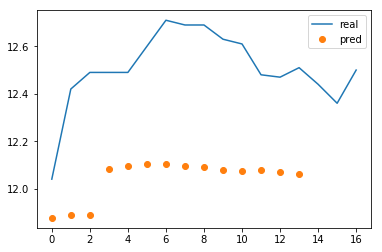

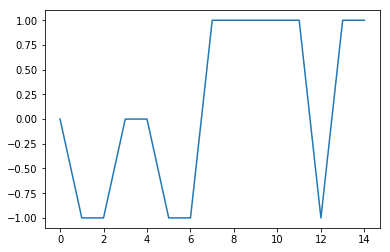

Next [12.076837] dif 0.14000000000000057 vector [[[12.32     12.5      12.85     11.44      2.041587]]] act -1 next act [-0.4231634]


In [ ]:
for a in range(100):
    d = get_live("SPCE")
    p = float(d['data'][0]['price'])
    prs.append(p)
    hist.append(d)
    clear_output()
    plt.plot(prs, label="real")
    plt.plot(preds, "o", label="pred")
    plt.legend()
    plt.show()
    plt.plot(actions)
    plt.show()

    _open  = float(d['data'][0]['price_open'])
    _price  = float(d['data'][0]['price'])
    _high  = float(d['data'][0]['day_high'])
    _low   = float(d['data'][0]['day_low'])
    _volume= int(d['data'][0]['volume'])/1000000
    
    if prev_val == None:
        prev_val = _price
    
    difa = _price - prev_val
    
    if difa < 0:
        action = SELL
    elif difa > 0:
        action = BUY
    else:
        action = HOLD
        
    actions.append(action)
    if difa != difa_ant:
        difa_ant = difa
    
    if _low < low:
        low = _low
    if _high > high:
        high = _high
    x = np.array([[_open, _price, high, low, _volume]])
    x = np.reshape(x, (x.shape[0], 1, x.shape[1]))
    
    pred = model.predict(x)
    preds.append(pred[0])
    
    next_action = pred[0] - _price
    print("Next", pred[0], "dif", difa, "vector", x, "act", action, "next act", next_action)
    prev_val = _price
    time.sleep(300)

In [439]:
_open  = float(d['data'][0]['price_open'])
_price  = float(d['data'][0]['price'])
_high  = float(d['data'][0]['day_high'])
_low   = float(d['data'][0]['day_low'])
_volume= int(d['data'][0]['volume'])/1000000

x = np.array([[_open, _price, high, low, _volume]])
x = np.reshape(x, (x.shape[0], 1, x.shape[1]))
    
pred = model.predict(x)
x, pred

(array([[[11.52    , 12.04    , 12.17    , 11.44    ,  5.982559]]]),
 array([[11.710033]], dtype=float32))

In [435]:
X_test[0]

array([[11.32  , 11.34  , 11.34  , 11.32  ,  0.5448]])

In [445]:
actions

[0]